In [30]:
import requests
import json
import re
import pandas as pd 

import seaborn as sns 
import spacy
import matplotlib.pyplot as plt

In [32]:
api_key = "ec24a147347176b9f82793ac2d9ace2a9f415bcb"
baseurl = "https://digital.janeaddams.ramapo.edu/api/items"
url_params = {"key" : api_key, "item_type" : 1, "page" : 1}

In [3]:
# make a get request to the RESTapi 
# only showing one page of results for this progress report 
response = requests.get(baseurl, url_params)
items = json.loads(response.text)

# "Text" Item Types

In [4]:
#extracts the actual text transciption from each item returned 
text_list = []
for item in items: 
    for elem in item["element_texts"]:
        if elem["element"]["name"] == "Text":
            text_list.append(elem["text"])

In [11]:
# removes HTML from transcription 
# replace <br> with newline characters  
# replace others with spaces to maintain word separation
r = '<br />'
r1 = '<.*?>'
r2 = '\r\n'
text_list_cleaned = []
for text in text_list:
    text = re.sub(r, ' ', text)
    text = re.sub(r1, '', text)
    text = re.sub(r2, ' ', text)
    text_list_cleaned.append(text)

In [12]:
#working with one piece of text for now 
text_working = text_list_cleaned[0]
#normalize 
text_normalize = text_working.lower()

In [13]:
#remove punctuation and special characters 
text_low_pnct = re.sub(r'[^\w\s]', '', text_normalize)

In [20]:
#split into words 
text_words = text_low_pnct.split()

In [24]:
from collections import Counter

In [26]:
#remove stopwords 
from spacy.lang.en.stop_words import STOP_WORDS

In [27]:
text_words_nostop = []
for word in text_words:
    if word not in STOP_WORDS:
        text_words_nostop.append(word)

In [28]:
Counter(text_words_nostop).most_common(10)

[('life', 5),
 ('familiar', 3),
 ('industrial', 3),
 ('familiarity', 2),
 ('artist', 2),
 ('shows', 2),
 ('interesting', 2),
 ('invention', 2),
 ('number', 2),
 ('young', 2)]

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


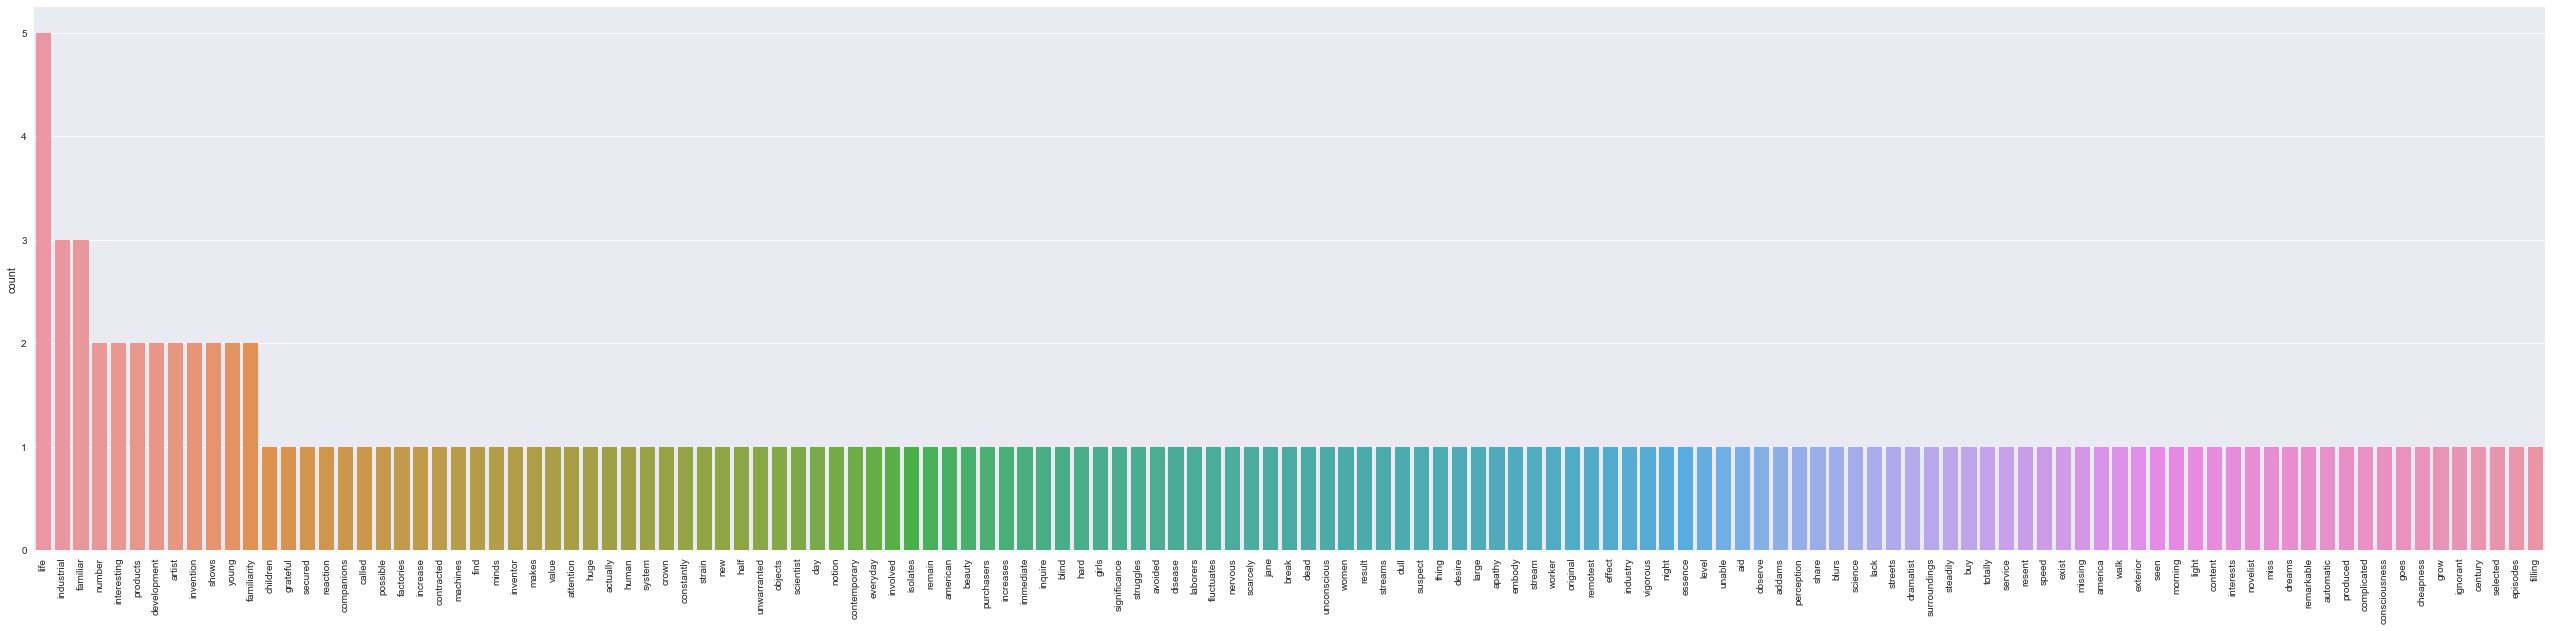

In [31]:
plt.figure(figsize=(45,10))
sns.countplot(text_words_nostop, order=pd.Series(text_words_nostop).value_counts().index)
plt.xticks(rotation=90)
plt.show()

This is just one piece of text, but we're hoping to aggregate word frequencies over sections of text grouped by author, tags, or time period and visualize the word frequencies. Another idea we had was to visualize the cosine similarity of writings between authors in a heatmap.   

# "Event" Item Types 

In [33]:
params_d = {'item_type': 'Event', 'key': api_key}

In [34]:
r_items = requests.get('https://digital.janeaddams.ramapo.edu/api/items?pretty_print', params = params_d)

In [35]:
items_json = json.loads(r_items.text)

In [36]:
event_lst = []
for dict in items_json:
    event_lst.append(dict['element_texts'][0]['text'])

In [37]:
tag_list = []
for dict in items_json:
    temp_list = []
    for d in dict['tags']:
        temp_list.append(d['name'])
    tag_list.append(temp_list)

In [38]:
dates_list = []
for item in event_lst:
    date= re.findall('\(([0-9\-)]+)', item)
    for num in date:
        dates_list.append(num.replace(")", ""))

In [39]:
zip_events = list(zip(event_lst, tag_list, dates_list))

In [40]:
events_df = pd.DataFrame(zip_events, columns = ['Event Name', 'Tags', 'Date'])

In [41]:
events_df.head()

,Event Name,Tags,Date
0,United States Presidential Election (1912),"[Democratic Party, Politics, Progressive Party...",1912
1,Philippine-American War (1899-1902),"[Philippines, War]",1899-1902
2,Conference on Truancy--Its Causes and Preventi...,"[Conferences, Education, Law]",1906
3,University of Chicago Convocation (1904),"[Education, Immigration, Lectures]",1904
4,Annual Conference for the Study of the Negro P...,"[African-Americans, Conferences]",1905
